In [106]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [107]:
experiment_time_ms = 19000

In [118]:
df = pd.read_csv('rawdata/1645703267/pulseLN1.csv', header=None, names=["value"])
df

,value
0,368
1,368
2,359
3,353
4,349
...,...
1729,319
1730,328
1731,342
1732,355


In [119]:
original_count = len(df['value'])
original_count

1734

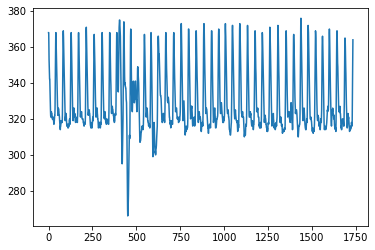

In [120]:
ax = plt.gca()
plt.plot(df.index, df['value'])

In [121]:
# remove small values
df = df.drop(df[df.value < 330].index)

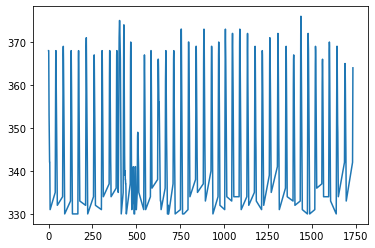

In [122]:
plt.plot(df.index, df['value'])

In [123]:
# number of points to be checked before and after
n = 5 
df['max'] = df.iloc[argrelextrema(df.value.values, np.greater_equal, order=n)[0]]['value']

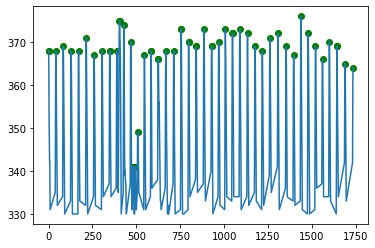

In [124]:
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['value'])

In [125]:
df = df.dropna()

In [126]:
peaks_count = len(df['max'])
peaks_count

57

In [127]:
# miliseconds
HRV = experiment_time_ms / peaks_count
HRV

333.3333333333333